In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('C:\\Users\\tanya\\Downloads\\ifood_df.csv')


In [6]:
df.head(10)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
5,62513.0,0,1,16,520,42,98,0,42,14,...,1,0,0,0,0,1,0,702,688,0
6,55635.0,0,1,34,235,65,164,50,49,27,...,0,0,0,0,1,0,0,563,536,0
7,33454.0,1,0,32,76,10,56,3,1,23,...,0,0,0,0,0,0,1,146,123,0
8,30351.0,1,0,19,14,0,24,3,3,2,...,1,0,0,0,0,0,1,44,42,0
9,5648.0,1,1,68,28,0,6,1,1,13,...,1,0,0,0,0,0,1,36,23,1


In [7]:
df.shape

(2205, 39)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [10]:
df.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

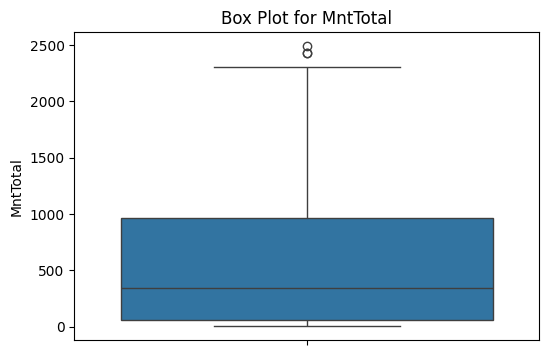

In [13]:
plt.figure(figsize=(6, 4))  
sns.boxplot(data=df, y='MntTotal')
plt.title('Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.show()

In [15]:
from sklearn.cluster import KMeans


In [19]:
X=df.iloc[:,[0,36]].values
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

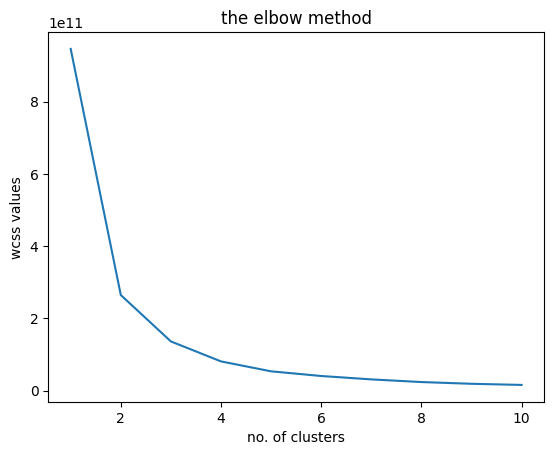

In [20]:
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('no. of clusters')
plt.ylabel('wcss values')
plt.show()

In [21]:
kmeansmodel=KMeans(n_clusters=5 , init='k-means++', random_state=0)

In [22]:
y_kmeans=kmeansmodel.fit_predict(X)

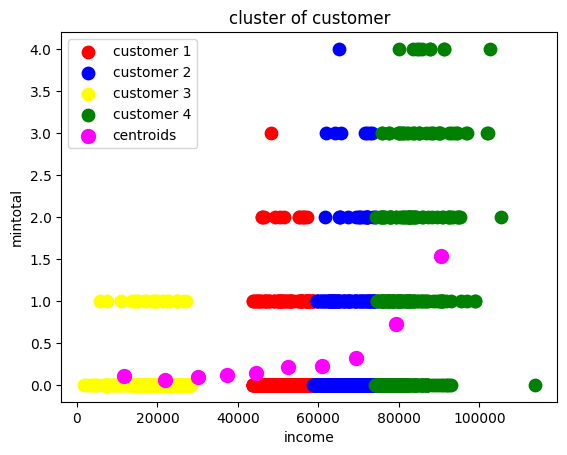

In [27]:
plt.scatter(X[y_kmeans==0,0] , X[y_kmeans==0,1],s=80,c="red",label='customer 1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1],s=80,c="blue",label='customer 2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1],s=80,c="yellow",label='customer 3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1],s=80,c="green",label='customer 4')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100,c='magenta',label='centroids')
plt.title('cluster of customer')
plt.xlabel('income')
plt.ylabel('mintotal')
plt.legend()
plt.show()